El presente notebook tiene como objetivo el brindar aplicaciones de ejemplo de las ANN. Importante mencionar que los ejemplos y materiale extraido fue consultado de textos y la pagina de "tensorflow.org"

# Librerias

In [7]:
## Conjunto de librerias a usar

### La idea aqui no es optimizar la cantidad de lineas, sino familiarizarse con las librerias a usar
### esto implica el importar cada una de las funciones de forma individual

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus
#import xgboost
from kneed import KneeLocator
import joblib
import mglearn
from IPython.display import Image
import sklearn as skl
from IPython import display
import glob
import imageio
import os
import PIL
from tensorflow.keras import layers
import time
import scipy
import sys
from mpl_toolkits.mplot3d import Axes3D
import math
import pickle
from scipy import stats

# Clonar modelos creados
from sklearn.base import clone 


## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV


## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_california_housing


## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


## IMPORTANTE: Libreria sklearn
import sklearn as skl ## importar la libreria de sklearn como skl


## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR


## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


# Ensemble methods
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor


# Reduction of Dimension
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA


# Unsupervised learning
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics.cluster import adjusted_rand_score


## Machine Learning - Deep Learning
import tensorflow as tf
from tensorflow import keras
from functools import partial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# SOM (Self-Organized Map) --- No Supervisado 
import SimpSOM as sps 

# Esta libreria no es estandar de Python o Conda, se debe cargar el archivo popsom.py al folder de trabajo
# El archivo popsom.py se obtiene de: https://github.com/njali2001/popsom/blob/master/popsom.py
import popsom as som

# LDA (linear Discriminant Analysis) -- Supervisado
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# ANN para Scikit
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias

## fin

In [6]:
# ver version de tf y keras

print(tf.__version__)
print(keras.__version__)

# fin

2.6.0
2.6.0


# ANN - modelo 1

In [8]:
# cargar datos

datos=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=datos.load_data()

print('\nTrain: ')
print(X_train_full.shape)
print(y_train_full.shape)

print('\nTest: ')
print(X_test.shape)
print(y_test.shape)

# fin


Train: 
(60000, 28, 28)
(60000,)

Test: 
(10000, 28, 28)
(10000,)


In [3]:
# crear conjunto de validacion para entrenamiento

X_valid, X_train = X_train_full[50000:]/255.0, X_train_full[:50000]/255.0
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]

# fin

In [4]:
# Crear diccionario con nombre de las categorias segun dataset

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]] # ejemplo

# fin

'Ankle boot'

In [5]:
# TF: modelo - secuencial ... agregar cada capa oculta 

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# fin

In [6]:
# modelo -secuencial ... indicar todas las capas

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# fin

In [7]:
# ver arquitectura del modelo creado

model.summary()

# fin

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.get_weights()

[array([[-0.05929216,  0.02640952, -0.01170789, ...,  0.05882587,
         -0.0017116 , -0.06908988],
        [-0.03046038, -0.06518485,  0.05337094, ...,  0.01062971,
          0.04944989,  0.05917312],
        [-0.05646289, -0.05557811, -0.0584863 , ...,  0.02792   ,
         -0.06381546, -0.01098481],
        ...,
        [ 0.00584826,  0.02465188, -0.01599296, ..., -0.05408397,
          0.0667949 ,  0.07177038],
        [-0.05289301,  0.02566639,  0.03827944, ...,  0.06373231,
         -0.01386013,  0.04934049],
        [-0.03816354, -0.047623  ,  0.07209291, ..., -0.01114916,
          0.02761832, -0.0740075 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [9]:
# Compile the model

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
             metrics = ['accuracy'])

# fin

In [10]:
# entrenar modelo

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    validation_data=(X_valid,y_valid))

# fin

Train on 5000 samples, validate on 55000 samples
Epoch 1/30
5000/5000 [==============================] - 4s 729us/sample - loss: 1.5065 - accuracy: 0.5558 - val_loss: 1.0424 - val_accuracy: 0.6803
Epoch 2/30
5000/5000 [==============================] - 3s 562us/sample - loss: 0.8836 - accuracy: 0.7066 - val_loss: 0.8100 - val_accuracy: 0.7256
Epoch 3/30
5000/5000 [==============================] - 3s 542us/sample - loss: 0.7352 - accuracy: 0.7580 - val_loss: 0.7558 - val_accuracy: 0.7388
Epoch 4/30
5000/5000 [==============================] - 3s 549us/sample - loss: 0.6623 - accuracy: 0.7780 - val_loss: 0.6824 - val_accuracy: 0.7778
Epoch 5/30
5000/5000 [==============================] - 3s 560us/sample - loss: 0.6138 - accuracy: 0.7992 - val_loss: 0.6757 - val_accuracy: 0.7656
Epoch 6/30
5000/5000 [==============================] - 3s 548us/sample - loss: 0.5721 - accuracy: 0.8158 - val_loss: 0.6206 - val_accuracy: 0.7858
Epoch 7/30
5000/5000 [==============================] - 3s 547u

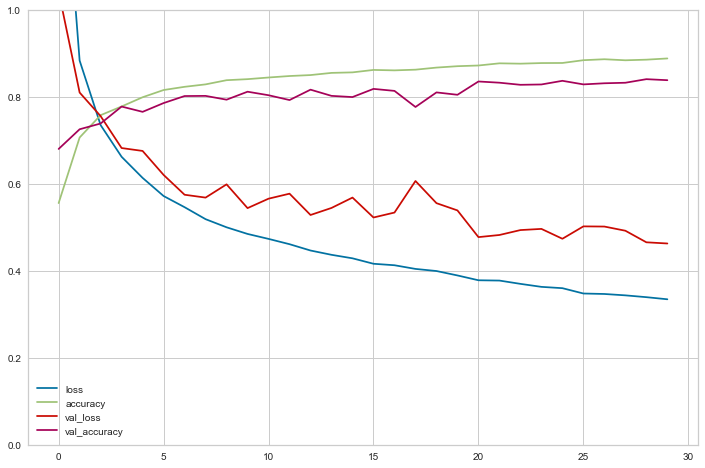

In [11]:
# graficar historial de entrenamiento

pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# fin

In [12]:
# evaluar en datos test

model.evaluate(X_test, y_test)

# fin

10000/10000 [==============================] - 1s 76us/sample - loss: 86.6041 - accuracy: 0.8029


[86.60412544555665, 0.8029]

In [14]:
# predecir con algunos datos

X_new = X_test[:3] # escoger datos 
y_proba = model.predict(X_new) # predecir
print(y_proba.round(5)) # redondear probab. (softmax)

y_pred = model.predict_classes(X_new)
print('\n')
print(y_pred)
# fin

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


[9 2 1]


# ANN - modelo 2

### Cargar datos

In [61]:
# cargar datos

datos=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=datos.load_data()

print('\nTrain shape (X-y): ')
print(X_train_full.shape)
print(y_train_full.shape)

print('\nTest shape (X-y): ')
print(X_test.shape)
print(y_test.shape)

# Normalizar datos a rango [0,1]
X_test = X_test/255.0 ## normalizar a rango [0,1]
X_train_full = X_train_full/255.0  ## normalizar a rango [0,1]

# Dividir datos de entrenamiento en grupos de train/validation
X_valid, X_train = X_train_full[50000:], X_train_full[:50000]
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]

# adicional - etiquetas
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print('\nX valid shape: ',X_valid.shape)
print('X train shape: ',X_train.shape)

# fin


Train shape (X-y): 
(60000, 28, 28)
(60000,)

Test shape (X-y): 
(10000, 28, 28)
(10000,)

X valid shape:  (55000, 28, 28)
X train shape:  (5000, 28, 28)


### Definir modelo

In [85]:
# modelo

input0=keras.layers.Input(shape=X_train.shape[1:])
input=keras.layers.Flatten(input_shape=X_train.shape[1:])(input0)
hidden1=keras.layers.Dense(100,activation='relu')(input)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input,hidden2])
output=keras.layers.Dense(10,activation='softmax')(concat)
model = keras.models.Model(inputs=[input0],outputs=[output])

print('Ver modelo:')
model.summary() # ver modelo

# fin

Ver modelo:
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 8)            0           input_12[0][0]                   
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 100)          900         flatten_6[0][0]                  
__________________________________________________________________________________________________
dense_34 (Dense)                (None, 30)           3030        dense_33[0][0]                   
________________________________________________________________________________

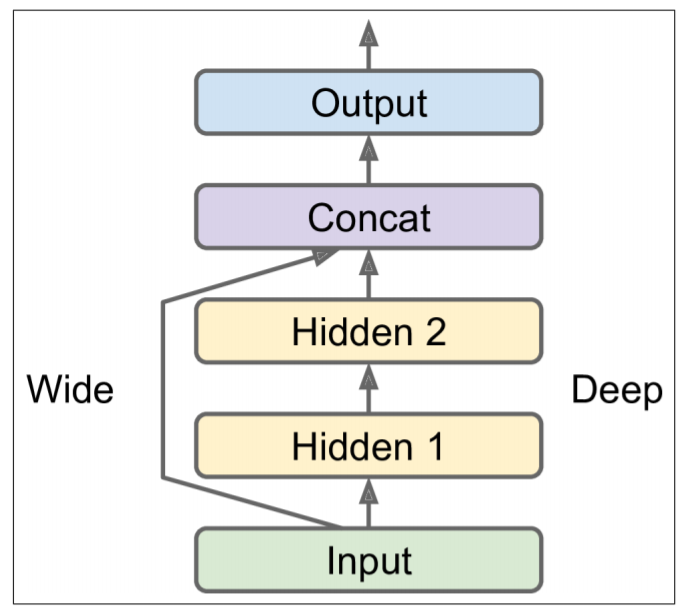

In [78]:
# estructura modelo
### Imagen extraida de : Aurélien Géron (O'Reilly) : Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
Image(filename = "Captura1.png")

### Entrenar modelo y evaluar

Train on 5000 samples, validate on 55000 samples
Epoch 1/30
5000/5000 [==============================] - 3s 642us/sample - loss: 1.4867 - accuracy: 0.5726 - val_loss: 1.1391 - val_accuracy: 0.6725
Epoch 2/30
5000/5000 [==============================] - 3s 599us/sample - loss: 0.9981 - accuracy: 0.6994 - val_loss: 0.9305 - val_accuracy: 0.7031
Epoch 3/30
5000/5000 [==============================] - 3s 588us/sample - loss: 0.8615 - accuracy: 0.7306 - val_loss: 0.8501 - val_accuracy: 0.7255
Epoch 4/30
5000/5000 [==============================] - 3s 610us/sample - loss: 0.7894 - accuracy: 0.7474 - val_loss: 0.7842 - val_accuracy: 0.7479
Epoch 5/30
5000/5000 [==============================] - 3s 588us/sample - loss: 0.7395 - accuracy: 0.7636 - val_loss: 0.7510 - val_accuracy: 0.7511
Epoch 6/30
5000/5000 [==============================] - 3s 599us/sample - loss: 0.7040 - accuracy: 0.7748 - val_loss: 0.7219 - val_accuracy: 0.7613
Epoch 7/30
5000/5000 [==============================] - 3s 591u

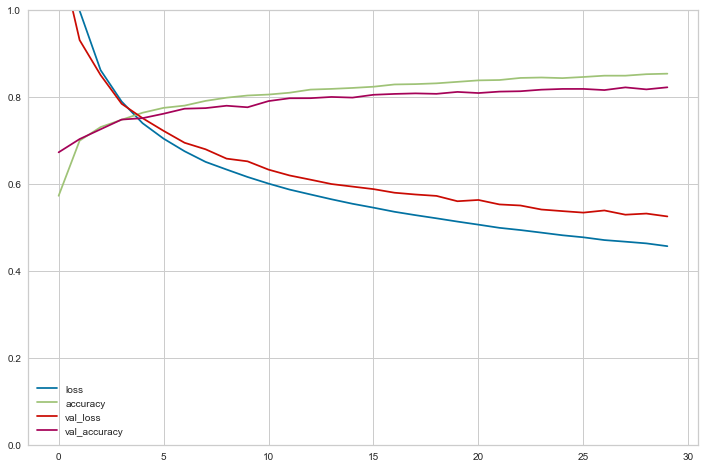

10000/10000 [==============================] - 0s 48us/sample - loss: 0.5452 - accuracy: 0.8122


AttributeError: 'Model' object has no attribute 'predict_classes'

In [63]:
# Entrenar red neuronal, evaluar desempeño de modelo y predecir

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer= keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
             metrics=['accuracy'])

# entrenar modelo
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    validation_data=(X_valid,y_valid))


# mostrar historial de entranmientos - metricas de evaluacion
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# evaluar en datos test mediante metrica de 'accuracy'
model.evaluate(X_test, y_test)


# predecir con algunos datos
X_new = X_test[:10] # escoger datos 
y_proba = model.predict(X_new) # predecir probabilidades por clase
y_pred = model.predict_classes(X_new) # predecir clase

print('\n\nValores reales: ',y_test[:10])
print('Probabilidades predecidos: ',y_proba.round(5)) # redondear probab. (softmax)
print('\nValores predecidos: ',y_pred) # segun probabs. indicar indice de clase


# fin

### Predecir nuevos datos con el modelo entrenado

In [59]:
# evaluar en datos test mediante metrica de 'accuracy'
model.evaluate(X_test, y_test)

## Seleccionar algunas observaciones de manera aleatoria
cantidad =20
ii=np.random.randint(low = 0,high=X_test.shape[0],size=cantidad)
XX = X_test[ii]
yy = y_test[ii]

# predecir con algunos datos
y_proba = model.predict(XX) # predecir probabilidades por clase
print('\n\nValores reales:\n',yy)
#print('Probabilidades predecidos: ',y_proba.round(5)) # redondear probab. (softmax)
y_pred = np.argmax(y_proba,axis=1)
print('\nValores predecidos:\n',y_pred) # segun probabs. indicar indice de clase

# fin

10000/10000 [==============================] - 0s 44us/sample - loss: 0.5489 - accuracy: 0.8054


Valores reales:
 [7 5 5 2 7 0 5 0 7 7 3 8 6 0 0 7 1 9 1 1]

Valores predecidos:
 [7 5 5 8 7 0 5 0 7 7 3 8 2 0 0 7 1 7 1 1]


# ANN - modelo 3

In [92]:
# cargar datos

from sklearn.datasets import fetch_california_housing

# cargar datos
housing = fetch_california_housing()

# dividir los datos en conjuntos
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print('X_train shape: ', X_train.shape)
print('X_valid shape: ', X_train.shape)
print('X_test shape: ', X_train.shape)
print('\n-------------\n')
print('y_train shape: ', y_train.shape)
print('y_valid shape: ', y_train.shape)
print('y_test shape: ', y_train.shape)

# fin

X_train shape:  (11610, 8)
X_valid shape:  (11610, 8)
X_test shape:  (11610, 8)

-------------

y_train shape:  (11610,)
y_valid shape:  (11610,)
y_test shape:  (11610,)


In [93]:
# modelo

input_a=keras.layers.Input(shape=[5])
input_b=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation='relu')(input_b)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
#concat=keras.layers.concatenate([input_a,hidden2])
concat=keras.layers.Concatenate()([input_a,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_a,input_b],outputs=[output]) ## definir entradas y salidas

# ver resumen
model.summary()

# fin

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_45 (Dense)                (None, 30)           210         input_20[0][0]                   
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 30)           930         dense_45[0][0]                   
___________________________________________________________________________________________

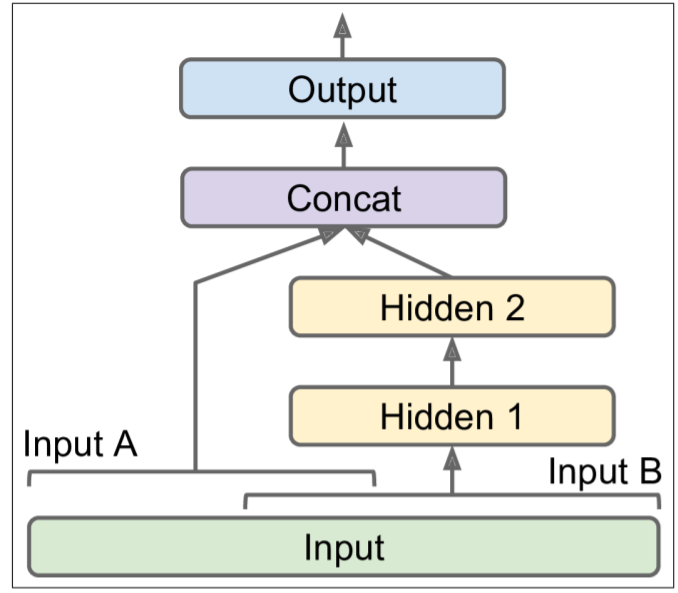

In [94]:
# estructura modelo
### Imagen extraida de : Aurélien Géron (O'Reilly) : Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
Image(filename = "Captura2.png")

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 117us/sample - loss: 0.3480 - val_loss: 0.3671
Epoch 2/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.3502 - val_loss: 0.3741
Epoch 3/20
11610/11610 [==============================] - ETA: 0s - loss: 0.3546- ETA: 0s - loss: 0.35 - 1s 74us/sample - loss: 0.3548 - val_loss: 0.3727
Epoch 4/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3448 - val_loss: 0.3811ETA: 0s - loss: 0.3 - ETA: 0s - loss: 0.348
Epoch 5/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3423 - val_loss: 0.3625
Epoch 6/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3392 - val_loss: 0.3734
Epoch 7/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3549 - val_loss: 0.4442A: 0s - loss:
Epoch 8/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3472 - val_loss

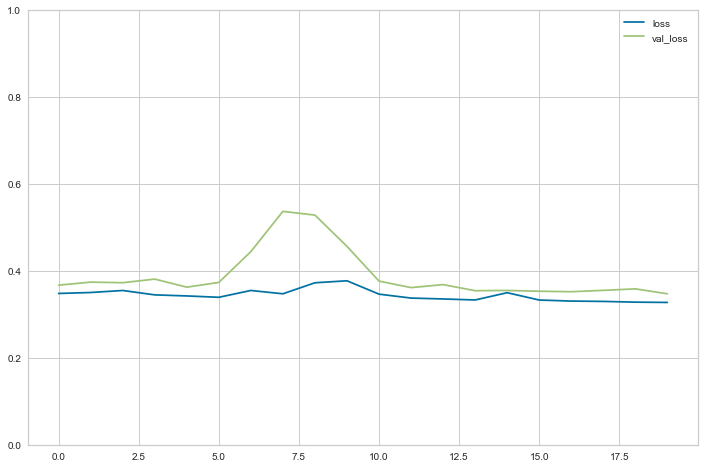

5160/5160 [==============================] - 0s 39us/sample - loss: 0.3121


Valor MSE de evaluacion:  0.31206347674362417


In [96]:
# compile - Train and Evaluate

#model.compile(loss='mse',optimizer='sgd')
model.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))


# Generar input "a" y "b"
X_train_a, X_train_b = X_train_scaled[:,:5], X_train_scaled[:,2:]
X_valid_a, X_valid_b = X_valid_scaled[:,:5], X_valid_scaled[:,2:]
X_test_a, X_test_b = X_test_scaled[:,:5], X_test_scaled[:,2:]

# fit
history = model.fit((X_train_a,X_train_b), y_train,
                    epochs=20,
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    validation_data=((X_valid_a,X_valid_b),y_valid))

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento - mse
mse_test = model.evaluate((X_test_a,X_test_b),y_test)
print('\n\nValor MSE de evaluacion: ',mse_test)


# fin

In [115]:
# Evaluate - Predict

# Evaluar rendimiento de modelo
mse_test = model.evaluate((X_test_a,X_test_b),y_test)
print('Valor MSE: ',mse_test)

# Prediccion
## Seleccionar algunas observaciones de manera aleatoria
cantidad =20
ii=np.random.randint(low = 0,high=X_test.shape[0],size=cantidad)
X_a = X_test_a[ii]
X_b = X_test_b[ii]
yy = y_test[ii]

y_pred = model.predict((X_a,X_b))

print('\n\n  Real  -  Predicho')
for a,b in zip(yy,y_pred):
    print(' %.4f     %.4f' % (a,b))

# fin

5160/5160 [==============================] - 0s 85us/sample - loss: 0.3121
Valor MSE:  0.31206347674362417


  Real  -  Predicho
 0.6970     0.8269
 2.4310     2.3430
 0.6100     0.9336
 1.2740     1.5920
 1.3070     1.0693
 1.0020     0.8003
 2.2180     2.5799
 2.6690     2.7889
 5.0000     3.7047
 1.2080     1.4498
 4.6460     3.2421
 0.5130     0.5590
 1.1760     1.3358
 4.1560     3.7065
 2.6830     2.0703
 2.1380     1.6307
 1.2110     1.4418
 1.9930     2.3267
 0.8160     0.9294
 3.1520     2.5444


# ANN - modelo 4

In [123]:
# cargar datos

from sklearn.datasets import fetch_california_housing

# cargar datos
housing = fetch_california_housing()

# dividir los datos en conjuntos
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print('X_train shape: ', X_train.shape)
print('X_valid shape: ', X_train.shape)
print('X_test shape: ', X_train.shape)
print('\n-------------\n')
print('y_train shape: ', y_train.shape)
print('y_valid shape: ', y_train.shape)
print('y_test shape: ', y_train.shape)

# fin

X_train shape:  (11610, 8)
X_valid shape:  (11610, 8)
X_test shape:  (11610, 8)

-------------

y_train shape:  (11610,)
y_valid shape:  (11610,)
y_test shape:  (11610,)


In [124]:
# modelo

input_a=keras.layers.Input(shape=[5])
input_b=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation='relu')(input_b)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
#concat=keras.layers.concatenate([input_a,hidden2])
concat=keras.layers.Concatenate()([input_a,hidden2])
output=keras.layers.Dense(1)(concat) # salida
aux_output=keras.layers.Dense(1)(hidden2) ## salida 2 - auxiliar
model=keras.models.Model(inputs=[input_a,input_b],outputs=[output,aux_output]) ## definir entradas y salidas

# ver resumen
model.summary()

# fin

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_59 (Dense)                (None, 30)           210         input_28[0][0]                   
__________________________________________________________________________________________________
input_27 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_60 (Dense)                (None, 30)           930         dense_59[0][0]                   
___________________________________________________________________________________________

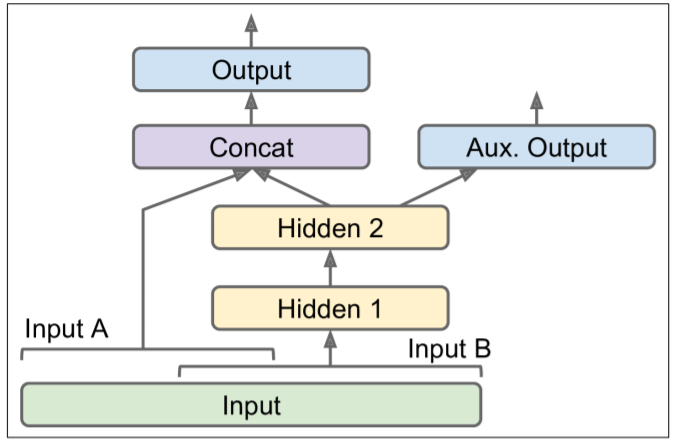

In [125]:
# estructura modelo
### Imagen extraida de : Aurélien Géron (O'Reilly) : Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
Image(filename = "Captura3.png")

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 130us/sample - loss: 0.5961 - dense_61_loss: 0.5944 - dense_62_loss: 0.6093 - val_loss: 0.4153 - val_dense_61_loss: 0.3911 - val_dense_62_loss: 0.6354
Epoch 2/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.3863 - dense_61_loss: 0.3677 - dense_62_loss: 0.5531 - val_loss: 0.4167 - val_dense_61_loss: 0.4010 - val_dense_62_loss: 0.5608
Epoch 3/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3883 - dense_61_loss: 0.3732 - dense_62_loss: 0.5236 - val_loss: 0.3860 - val_dense_61_loss: 0.3700 - val_dense_62_loss: 0.5331
Epoch 4/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.3621 - dense_61_loss: 0.3467 - dense_62_loss: 0.5013 - val_loss: 0.3823 - val_dense_61_loss: 0.3675 - val_dense_62_loss: 0.5178
Epoch 5/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3614 - dense_61_loss: 0

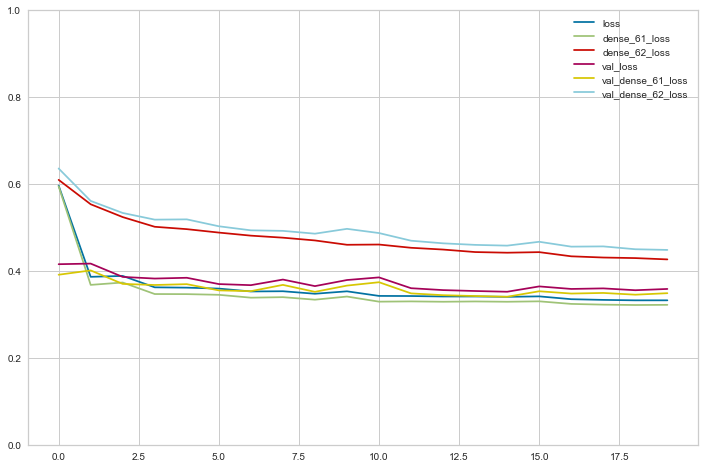

5160/5160 [==============================] - 0s 50us/sample - loss: 0.3586 - dense_61_loss: 0.3500 - dense_62_loss: 0.4552


mse total:  0.3586336448211078
mse out:  0.34996492
mse out_aux:  0.45521045


In [130]:
# compile - Train and Evaluate

# Ponerle mas peso a la salida principal (0.9) y menos a la secundaria (0.1)


#model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer='sgd')
model.compile(loss=['mse','mse'],
              loss_weights=[0.9,0.1],
              optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))

# Generar input "a" y "b"
X_train_a, X_train_b = X_train_scaled[:,:5], X_train_scaled[:,2:]
X_valid_a, X_valid_b = X_valid_scaled[:,:5], X_valid_scaled[:,2:]
X_test_a, X_test_b = X_test_scaled[:,:5], X_test_scaled[:,2:]

# fit
history = model.fit((X_train_a,X_train_b),
                    (y_train,y_train),
                    epochs=20,
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    validation_data=((X_valid_a,X_valid_b),(y_valid,y_valid)))


# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento - mse
mse_total, mse_out, mse_out_aux = model.evaluate((X_test_a,X_test_b),(y_test,y_test))
print('\n\nmse total: ',mse_total)
print('mse out: ',mse_out)
print('mse out_aux: ',mse_out_aux)

# fin

In [142]:
# Evaluate - Predict

# Evaluar rendimiento de modelo
mse_total, mse_out, mse_out_aux = model.evaluate((X_test_a,X_test_b),(y_test,y_test))
print('\n\nmse total:   ',round(mse_total,4))
print('mse out:     ',round(mse_out,4))
print('mse out_aux: ',round(mse_out_aux,4))

# Prediccion
## Seleccionar algunas observaciones de manera aleatoria
cantidad =20
ii=np.random.randint(low = 0,high=X_test.shape[0],size=cantidad)
X_a = X_test_a[ii]
X_b = X_test_b[ii]
yy = y_test[ii]

y_pred, y_pred_aux = model.predict((X_a,X_b))

print('\n\n  Real  -  Out  -  Out_aux')
for a,b,c in zip(yy,y_pred,y_pred_aux):
    print(' %3.4f   %3.4f   %3.4f' % (a,b,c))

# fin

5160/5160 [==============================] - 1s 123us/sample - loss: 0.3586 - dense_61_loss: 0.3500 - dense_62_loss: 0.4552


mse total:    0.3586
mse out:      0.35
mse out_aux:  0.4552


  Real  -  Out  -  Out_aux
 1.6130   2.2535   2.5058
 0.7190   0.9356   0.7568
 1.9240   1.5821   1.2399
 5.0000   4.4177   3.8682
 0.9750   1.3207   1.4486
 1.5770   2.5158   3.4511
 1.2810   1.9678   3.0232
 1.9290   2.3311   2.2157
 1.1250   0.8042   0.7634
 0.7920   0.9770   1.1205
 4.3240   3.5612   3.4634
 0.6090   0.9162   1.1155
 5.0000   4.0001   3.2326
 0.5990   0.8727   1.0226
 1.7080   2.0057   2.2686
 3.9530   4.3813   4.2822
 4.4090   2.7647   2.8926
 0.5990   0.8727   1.0226
 1.5630   1.3423   0.9843
 1.4310   1.6830   1.4479


In [143]:
# guardar modelo

model.save('my_keras_model.h5')

# fin

In [144]:
# cargar modelo entrenado

model = keras.models.load_model('my_keras_model.h5')

# fin

# ANN -  modelo 4 (Con Mejores Practicas)

In [148]:
# cargar datos

from sklearn.datasets import fetch_california_housing

# cargar datos
housing = fetch_california_housing()

# dividir los datos en conjuntos
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print('X_train shape: ', X_train.shape)
print('X_valid shape: ', X_train.shape)
print('X_test shape: ', X_train.shape)
print('\n-------------\n')
print('y_train shape: ', y_train.shape)
print('y_valid shape: ', y_train.shape)
print('y_test shape: ', y_train.shape)

# fin

X_train shape:  (11610, 8)
X_valid shape:  (11610, 8)
X_test shape:  (11610, 8)

-------------

y_train shape:  (11610,)
y_valid shape:  (11610,)
y_test shape:  (11610,)


In [166]:
# modelo

# Nota: existen 03 regularizadores: kernel_regularizer / activity_regularizer / bias_regularizer
# estos permiten agregar la regularizacion ya sea L1 o L2 ... otra debe ser creada como personalizada


input_a=keras.layers.Input(shape=[5])
input_b=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(input_b)
hidden2=keras.layers.Dense(30,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(hidden1)
#concat=keras.layers.concatenate([input_a,hidden2])
concat=keras.layers.Concatenate()([input_a,hidden2])
output=keras.layers.Dense(1)(concat) # salida
aux_output=keras.layers.Dense(1)(hidden2) ## salida 2 - auxiliar
model=keras.models.Model(inputs=[input_a,input_b],outputs=[output,aux_output]) ## definir entradas y salidas

# ver resumen
model.summary()

# fin

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_88 (Dense)                (None, 30)           210         input_46[0][0]                   
__________________________________________________________________________________________________
input_45 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_89 (Dense)                (None, 30)           930         dense_88[0][0]                   
___________________________________________________________________________________________

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 2s 137us/sample - loss: 1.0582 - dense_90_loss: 0.9260 - dense_91_loss: 1.8466 - val_loss: 0.7458 - val_dense_90_loss: 0.6400 - val_dense_91_loss: 1.3000
Epoch 2/200
11610/11610 [==============================] - 1s 97us/sample - loss: 0.6426 - dense_90_loss: 0.5532 - dense_91_loss: 1.0507 - val_loss: 0.6531 - val_dense_90_loss: 0.5715 - val_dense_91_loss: 0.9881
Epoch 3/200
11610/11610 [==============================] - 1s 96us/sample - loss: 0.6435 - dense_90_loss: 0.5750 - dense_91_loss: 0.8573 - val_loss: 0.7600 - val_dense_90_loss: 0.6939 - val_dense_91_loss: 0.9527
Epoch 4/200
11610/11610 [==============================] - 1s 98us/sample - loss: 0.6774 - dense_90_loss: 0.6146 - dense_91_loss: 0.8400 - val_loss: 0.5896 - val_dense_90_loss: 0.5212 - val_dense_91_loss: 0.7956
Epoch 5/200
11610/11610 [==============================] - 1s 98us/sample - loss: 0.5389 - dense_90_lo

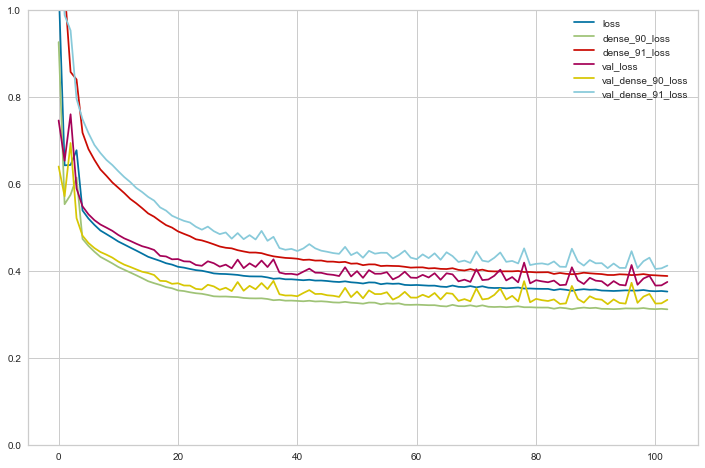

5160/5160 [==============================] - 0s 67us/sample - loss: 0.3427 - dense_90_loss: 0.3001 - dense_91_loss: 0.3798


mse total:  0.3427454639543859
mse out:  0.3001442
mse out_aux:  0.3797838


In [167]:
# compile - Train and Evaluate

# Ponerle mas peso a la salida principal (0.9) y menos a la secundaria (0.1)
# Recordar que el valor de error (loss) tendrá tanto de output y output_aux


#model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer='sgd')
model.compile(loss=['mse','mse'],
              loss_weights=[0.9,0.1],
              optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))



# Generar datos para input "a" y "b"
X_train_a, X_train_b = X_train_scaled[:,:5], X_train_scaled[:,2:]
X_valid_a, X_valid_b = X_valid_scaled[:,:5], X_valid_scaled[:,2:]
X_test_a, X_test_b = X_test_scaled[:,:5], X_test_scaled[:,2:]

########################################

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'best_model.h5' # nombre de archivo a guardar modelo entrenado
chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

#########################################

# fit - ajuste de modelo
history = model.fit((X_train_a,X_train_b),
                    (y_train,y_train),
                    epochs=200, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp], ## se indican callbacks checkpoint & parada
                    validation_data=((X_valid_a,X_valid_b),(y_valid,y_valid)))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

#######################################

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento - mse
mse_total, mse_out, mse_out_aux = model.evaluate((X_test_a,X_test_b),(y_test,y_test))
print('\n\nmse total: ',mse_total)
print('mse out: ',mse_out)
print('mse out_aux: ',mse_out_aux)

# fin

In [ ]:
# Cargar Modelo entrenado

direccion = 'best_model.h5' # nombre de archivo a guardar modelo entrenado
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

# fin

In [168]:
# Evaluate - Predict

# Evaluar rendimiento de modelo
mse_total, mse_out, mse_out_aux = model.evaluate((X_test_a,X_test_b),(y_test,y_test))
print('\n\nmse total:   ',round(mse_total,4))
print('mse out:     ',round(mse_out,4))
print('mse out_aux: ',round(mse_out_aux,4))

# Prediccion
## Seleccionar algunas observaciones de manera aleatoria
cantidad =30
ii=np.random.randint(low = 0,high=X_test.shape[0],size=cantidad)
X_a = X_test_a[ii]
X_b = X_test_b[ii]
yy = y_test[ii]

y_pred, y_pred_aux = model.predict((X_a,X_b))

print('\n\n  Real  -  Out  -  Out_aux')
for a,b,c in zip(yy,y_pred,y_pred_aux):
    print(' %3.4f   %3.4f   %3.4f' % (a,b,c))

# fin

5160/5160 [==============================] - 1s 102us/sample - loss: 0.3427 - dense_90_loss: 0.3001 - dense_91_loss: 0.3798


mse total:    0.3427
mse out:      0.3001
mse out_aux:  0.3798


  Real  -  Out  -  Out_aux
 1.1250   0.4491   0.3701
 3.7950   3.6550   3.3883
 1.8410   2.2426   2.1289
 2.0530   2.3739   2.2166
 3.3500   3.2789   3.3577
 1.9170   1.9203   1.9237
 2.2640   2.3235   2.3185
 2.7950   1.9933   1.9095
 2.7010   3.0779   2.7914
 0.8500   1.0288   0.8386
 3.4090   3.6586   3.6775
 1.7440   2.2135   2.0687
 1.2800   1.3007   1.1399
 2.5930   2.8360   3.0132
 3.9350   2.7760   2.8357
 0.5840   0.9696   0.9275
 1.5630   0.8976   0.8495
 5.0000   2.9734   2.9741
 1.6560   1.6655   1.6365
 1.6550   1.6312   1.1004
 0.9960   1.3187   1.7537
 2.1060   2.1611   2.0862
 1.9990   2.4114   2.6721
 0.7500   0.8190   0.7760
 2.8670   3.3852   3.2105
 1.8670   2.6081   2.3030
 2.6130   3.3043   3.0162
 4.0260   2.9122   3.2266
 1.4690   1.2910   1.2021
 0.5060   0.6030   0.8326


# ANN - Transfer Learning (Reusar capas ya entrenadas)

In [33]:
# cargar datos

from sklearn.datasets import fetch_california_housing

# cargar datos
housing = fetch_california_housing()

# dividir los datos en conjuntos
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# estandarizar los datos
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)
X_test_s = scaler.transform(X_test)

print('X_train shape: ', X_train.shape)
print('X_valid shape: ', X_train.shape)
print('X_test shape: ', X_train.shape)
print('\n-------------\n')
print('y_train shape: ', y_train.shape)
print('y_valid shape: ', y_train.shape)
print('y_test shape: ', y_train.shape)

# fin

X_train shape:  (11610, 8)
X_valid shape:  (11610, 8)
X_test shape:  (11610, 8)

-------------

y_train shape:  (11610,)
y_valid shape:  (11610,)
y_test shape:  (11610,)


In [34]:
# modelo Inicial .... el transfer learning se realizará en los bloques de codigo posterio

# RECORDAR !!!: el transfer learning es reutilizar las capas ya entrenadas de un modelo. En este punto aun
# vamos a crear el modelo inicial para entrenar y reusar algunas de sus capas. 


# Nota: existen 03 regularizadores: kernel_regularizer / activity_regularizer / bias_regularizer
# estos permiten agregar la regularizacion ya sea L1 o L2 ... otra debe ser creada como personalizada


input=keras.layers.Input(shape=X_train.shape[1:],name='i')
hidden1=keras.layers.Dense(80,name='h1',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(input)
hidden2=keras.layers.Dense(50,name='h2',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(hidden1)
hidden3=keras.layers.Dense(20,name='h3',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(hidden2)
output=keras.layers.Dense(1,name='out')(hidden3) # salida
model=keras.models.Model(inputs=[input],outputs=[output]) ## definir entradas y salidas

# ver resumen
model.summary()

# fin

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i (InputLayer)               [(None, 8)]               0         
_________________________________________________________________
h1 (Dense)                   (None, 80)                720       
_________________________________________________________________
h2 (Dense)                   (None, 50)                4050      
_________________________________________________________________
h3 (Dense)                   (None, 20)                1020      
_________________________________________________________________
out (Dense)                  (None, 1)                 21        
Total params: 5,811
Trainable params: 5,811
Non-trainable params: 0
_________________________________________________________________


In [12]:
# ver capas del modelo creado

model.layers

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 117us/sample - loss: 0.6524 - val_loss: 0.8181
Epoch 2/200
11610/11610 [==============================] - 1s 79us/sample - loss: 0.5592 - val_loss: 0.5581
Epoch 3/200
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5161 - val_loss: 1.2912
Epoch 4/200
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5136 - val_loss: 0.5313
Epoch 5/200
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4827 - val_loss: 0.6024
Epoch 6/200
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4741 - val_loss: 0.4915
Epoch 7/200
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4715 - val_loss: 0.5141- loss: 0.47
Epoch 8/200
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4561 - val_loss: 0.4812
Epoch 9/200
11610/11610 [==============================] - 1s 81us/sample 

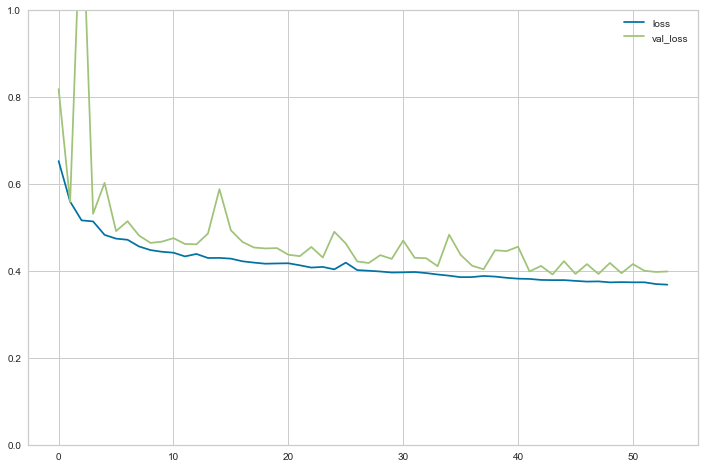

5160/5160 [==============================] - 0s 48us/sample - loss: 0.3618


mse total:  0.36181318533512974


In [35]:
# compile - Train and Evaluate

# Ponerle mas peso a la salida principal (0.9) y menos a la secundaria (0.1)
# Recordar que el valor de error (loss) tendrá tanto de output y output_aux

#model.compile(loss='mse',optimizer='sgd')
model.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'best_model.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

#########################################

# fit - ajuste de modelo
history = model.fit((X_train_s),
                    (y_train),
                    epochs=200, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp], ## se indican callbacks checkpoint & parada
                    validation_data=(X_valid_s,y_valid))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

#######################################

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento - mse
mse_total = model.evaluate(X_test_s,y_test)
print('\n\nmse total: ',mse_total)

# fin

In [ ]:
# Cargar Modelo entrenado

direccion = 'best_model.h5' # nombre de archivo a guardar modelo entrenado
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

# fin

In [36]:
# Evaluate - Predict

# Evaluar rendimiento de modelo
mse_total = model.evaluate(X_test_s,y_test)
print('\n\nmse total:   ',round(mse_total,4))

# Prediccion
## Seleccionar algunas observaciones de manera aleatoria
cantidad =30
ii=np.random.randint(low = 0,high=X_test_s.shape[0],size=cantidad)
X_s = X_test_s[ii]
yy = y_test[ii]

y_pred = model.predict(X_s)

print('\n\n  Real  -  Out')
for a,b in zip(yy,y_pred):
    print(' %3.4f   %3.4f' % (a,b))

# fin

5160/5160 [==============================] - ETA: 0s - loss: 0.356 - 0s 37us/sample - loss: 0.3618


mse total:    0.3618


  Real  -  Out
 0.7060   0.8833
 2.3820   2.5954
 2.9950   3.6170
 1.3700   1.3940
 2.4580   1.7134
 1.4630   1.2943
 1.7260   1.6293
 1.0510   1.4483
 3.2650   1.6502
 2.0680   1.3680
 0.5170   0.6162
 1.6350   2.1047
 5.0000   4.3628
 1.2370   1.7424
 1.9930   2.0959
 1.1800   1.3127
 0.7060   0.9131
 2.7120   3.0979
 1.5110   1.4077
 0.9510   1.4917
 2.0000   1.7799
 2.8410   3.4895
 1.6170   1.7094
 1.8750   1.6765
 2.1040   2.1629
 2.5800   2.2623
 2.5490   3.4891
 1.4950   1.1457
 1.0300   1.0743
 2.2760   2.2083


## Uso de Capas ya entrenadas - Agregar nuevas capas

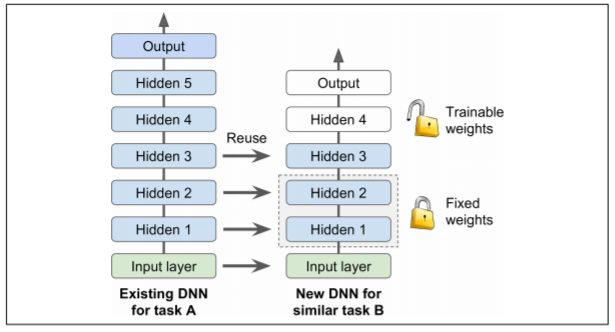

In [16]:
# estructura modelo
### Imagen extraida de : Aurélien Géron (O'Reilly) : Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
Image(filename = "Captura4.png")

## Clonar Modelo Entrenado

In [222]:
## extraer algunas capas del modelo deseado

## models.clone_model() # clonar un modelo
## models.load_model() # cargar modelo guardado en archivo
## set_weights() -- get_weights()

# cargar modelo entrenado
model = keras.models.load_model('best_model.h5')

# copiar arquitectura de modelo --- solo arqui., no copia valores entrenados
model_a = keras.models.clone_model(model) ## leer mejor modelo guardado por Callback Checkpoint

# copiar pesos del modelo entreanado original
model_a.set_weights(model.get_weights()) ## pasar pesos del modelo 

# fin

In [38]:
# Seleccion de capas del modelo inicial

model_b = keras.models.Sequential(model_a.layers[:-2]) ## todas las capas excepto 02 ultimas [:-2]
model_b.add(keras.layers.Dense(1,name='outb'))

model_b.summary()

# fin

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 80)                720       
_________________________________________________________________
h2 (Dense)                   (None, 50)                4050      
_________________________________________________________________
outb (Dense)                 (None, 1)                 51        
Total params: 4,821
Trainable params: 4,821
Non-trainable params: 0
_________________________________________________________________


In [39]:
# ver parametros del modelo inicial - antecedente a modelo_b

model.summary() # modelo inicial 

# fin

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i (InputLayer)               [(None, 8)]               0         
_________________________________________________________________
h1 (Dense)                   (None, 80)                720       
_________________________________________________________________
h2 (Dense)                   (None, 50)                4050      
_________________________________________________________________
h3 (Dense)                   (None, 20)                1020      
_________________________________________________________________
out (Dense)                  (None, 1)                 21        
Total params: 5,811
Trainable params: 5,811
Non-trainable params: 0
_________________________________________________________________


## Entrenar nuevo modelo con primeras capas ya entrenadas previamente


--------------------------------
Entrenar nuevas capas agregadas: 
Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3308 - val_loss: 0.3643
Epoch 2/50
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3293 - val_loss: 0.3536
Epoch 3/50
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3298 - val_loss: 0.3511
Epoch 4/50
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3279 - val_loss: 0.3595
Epoch 5/50
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3296 - val_loss: 0.3561
Epoch 6/50
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3287 - val_loss: 0.3476
Epoch 7/50
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3297 - val_loss: 0.3549
Epoch 8/50
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3277 - val_loss: 0.3480
Epoch 9/50
11610/11610 [==

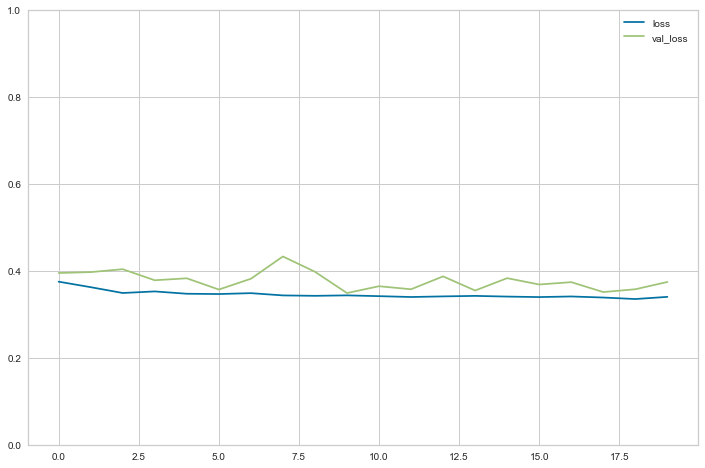

5160/5160 [==============================] - 0s 47us/sample - loss: 0.3184

------------------------
MSE total:  0.3184125918519589


In [42]:
# nuevo modelo

############################### ADICIONAL REQUERIDO  #############################################
### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'best_model_aux.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True)

##################################################################################################

# Empezar

#### CONGELAR CAPAS ######
# Congelar las capas ya entrenadas: 
for layer in model_b.layers[:-2]:
    layer.trainable = False

################## Entrenar Capas agregadas #######################
#model_b.compile(loss='mse',optimizer='sgd')
model_b.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))


print('\n--------------------------------\nEntrenar nuevas capas agregadas: ')
history= model_b.fit(X_train_s,y_train,epochs=50,callbacks=[chk,stp],validation_data=(X_valid_s,y_valid))
    
## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model_b = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

# test de rendimiento de estado actual:
mse_total = model_b.evaluate(X_test_s,y_test)
print('\n------------------------\nMSE total: ',mse_total)


############### Entrenar todo el modelo completo ###################

#### DESCONGELAR CAPAS ###### 
# descongelar las capas: 
for layer in model_b.layers[:-2]:
    layer.trainable = True

model_b.compile(loss='mse',optimizer='sgd')
print('\n--------------------------------\nEntrenar modelo completo: ')
history= model_b.fit(X_train_s,y_train,
                     epochs=100,
                     batch_size=64,
                     shuffle=True, # mezclar las observaciones aleatoriamente
                     callbacks=[chk,stp],
                     validation_data=(X_valid_s,y_valid))
    
## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model_b = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

###################################################################

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# test de rendimiento - mse
mse_total = model_b.evaluate(X_test_s,y_test)
print('\n------------------------\nMSE total: ',mse_total)

# fin

# Optimizadores para entrenar ANN

In [ ]:
# Optimizadores .... descenso de gradiente - Solo se enumeran

# Momentum gradiente
optimizer = keras.optimizers.SGD(lr=0.001,momentum=0.9) # aconsejable momentum=0.9

# Nesterov- accelerated gradient
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

#### tanto momentum como Nesterov hacen un seguimiento al vector gradiente

# RMSProp ---- (Es mejor que AdaGrad)
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9) # aconsejable rho=0.9

## AdaGrad y RMSProp hacen un seguimiento al modulo del gradiente

# Adam : adaptive moment estimation == Momentum + RMSprop
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# fin

# Learning Rate (lr)

In [ ]:
## lr: learning rate

# decaimiento de potencia
optimizer = keras.optimizer.SGD(lr=0.01,decay=1e-4) ## agregar al optimizador el parametro "decay"
# el parametro decay es el inverso de la cantidad de pasos para que decaiga en 1 unidad:
# ejemplo: decay=1e-4 , inverso es 1e4 = 1000... si lr=X/1, luego de 1000 pasos, lr=X/2, luego de 1000 pasos, lr=X/3 ... y asi va bajando


# Callback --- ajuste del lr
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)
# aqui se crea un callback que cada 5 pasos en caso no haya mejora en el modelo se multiplicará el
# parametro de aprendizaje lr (learning rate) por el factor dado para ver si puede mejorar lr <- lr*factor


# ejemplo de factor exponencial
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.001,15,0.1)
optimizer = keras.optimizer.SGC(learning_rate)
# significa que n0 = 0.001 (lr valor inicial) el (15,0.1) significa que cada 15 pasos el lr decrece en 0.1
# es decir 0.001*(0.1)^(steps/15) ... el lr (0.001 inicialmente) decrece en un factor de 0.1 cada 15 pasos


# fin

# Regularizacion L1 y L2

In [ ]:
## en Keras se tienen 03 tipos de regularizacion:

# kernel_regularizer : regularizar los pesos de la capa (los pesos asociados)
# bias_regularizer : regularizar el bias de la capa
# activity_regularizer : regularizar la salida de la capa (solo las salidas de la capa)

# Ejemplos:

# añadir un regularizador del tipo L1 con valor 0.01
keras.layers.Dense(kernel_regularizer=keras.regularizers.l1(0.01))
 
# añadir un regularizador del tipo L2 con valor 0.05
keras.layers.Dense(kernel_regularizer=keras.regularizers.l2(0.05))

# añadir un regularizador del tipo L1 & L2 con l1=0.3 Y l2=0.8 
keras.layers.Dense(kernel_regularizer=keras.regularizers.l1_l2(l1=0.3,l2=0.8))

# fin

# ANN  (Aplicando Drop Out)

In [46]:
# cargar datos

from sklearn.datasets import fetch_california_housing

# cargar datos
housing = fetch_california_housing()

# dividir los datos en conjuntos
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# estandarizar los datos
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)
X_test_s = scaler.transform(X_test)

print('X_train shape: ', X_train.shape)
print('X_valid shape: ', X_valid.shape)
print('X_test shape: ', X_test.shape)
print('\n-------------\n')
print('y_train shape: ', y_train.shape)
print('y_valid shape: ', y_valid.shape)
print('y_test shape: ', y_test.shape)

# fin

X_train shape:  (11610, 8)
X_valid shape:  (11610, 8)
X_test shape:  (11610, 8)

-------------

y_train shape:  (11610,)
y_valid shape:  (11610,)
y_test shape:  (11610,)


In [53]:
# modelo

# Nota: existen 03 regularizadores: kernel_regularizer / activity_regularizer / bias_regularizer
# estos permiten agregar la regularizacion ya sea L1 o L2 ... otra debe ser creada como personalizada

# Se agrega la funcionalidad de entrenamiento mediante Drop-Out, mediante el cual con una probabilidad
# definida por el rate (dentro del drop-out) se indica cuantas neuronas de la capa oculta se van a "apagar"
# apagar la neurona significa que sus valores se ponen a 0 indiferente de las señales de entrada
# se intenta lograr una mejor generalizacion mediante el uso de esta tecnica propuesta por Greoffrey Hinton

#### IMPORTANTE ####
# NOTA: El drop-Out solo se activa para el entrenamiento (fit), en la predicción no se aplica. 


input=keras.layers.Input(shape=X_train.shape[1:],name='i')
d1 = keras.layers.Dropout(rate=0.2,name='d1')(input)
hidden1=keras.layers.Dense(80,name='h1',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(d1)
d2 = keras.layers.Dropout(rate=0.2,name='d2')(hidden1)
hidden2=keras.layers.Dense(50,name='h2',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(d2)
d3 = keras.layers.Dropout(rate=0.2,name='d3')(hidden2)
hidden3=keras.layers.Dense(20,name='h3',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(d3)
output=keras.layers.Dense(1,name='out')(hidden3) # salida
model=keras.models.Model(inputs=[input],outputs=[output]) ## definir entradas y salidas

# ver resumen
model.summary()

# fin

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i (InputLayer)               [(None, 8)]               0         
_________________________________________________________________
d1 (Dropout)                 (None, 8)                 0         
_________________________________________________________________
h1 (Dense)                   (None, 80)                720       
_________________________________________________________________
d2 (Dropout)                 (None, 80)                0         
_________________________________________________________________
h2 (Dense)                   (None, 50)                4050      
_________________________________________________________________
d3 (Dropout)                 (None, 50)                0         
_________________________________________________________________
h3 (Dense)                   (None, 20)                1020

In [13]:
# comparar cantidad de parametros Con Dropout (arriba) vs Sin Dropout (aqui)

input=keras.layers.Input(shape=X_train.shape[1:],name='i')
hidden1=keras.layers.Dense(80,name='h1',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(input)
hidden2=keras.layers.Dense(50,name='h2',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(hidden1)
hidden3=keras.layers.Dense(20,name='h3',activation='selu',kernel_regularizer=keras.regularizers.l2(0.001))(hidden2)
output=keras.layers.Dense(1,name='out')(hidden3) # salida
model2=keras.models.Model(inputs=[input],outputs=[output]) ## definir entradas y salidas

# ver resumen
model2.summary()

# fin

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i (InputLayer)               [(None, 784)]             0         
_________________________________________________________________
h1 (Dense)                   (None, 80)                62800     
_________________________________________________________________
h2 (Dense)                   (None, 50)                4050      
_________________________________________________________________
h3 (Dense)                   (None, 20)                1020      
_________________________________________________________________
out (Dense)                  (None, 1)                 21        
Total params: 67,891
Trainable params: 67,891
Non-trainable params: 0
_________________________________________________________________


In [55]:
# capas del modelo definido

model.layers

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 118us/sample - loss: 0.6234 - val_loss: 0.4844
Epoch 2/200
11610/11610 [==============================] - 1s 81us/sample - loss: 0.6326 - val_loss: 0.4436
Epoch 3/200
11610/11610 [==============================] - 1s 78us/sample - loss: 0.6220 - val_loss: 0.4528
Epoch 4/200
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6225 - val_loss: 0.6423
Epoch 5/200
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6184 - val_loss: 0.5130
Epoch 6/200
11610/11610 [==============================] - 1s 79us/sample - loss: 0.6108 - val_loss: 0.4570
Epoch 7/200
11610/11610 [==============================] - 1s 78us/sample - loss: 0.6110 - val_loss: 0.4492: 0s - loss: 0
Epoch 8/200
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6098 - val_loss: 0.4886
Epoch 9/200
11610/11610 [==============================] - 1s 83us/sampl

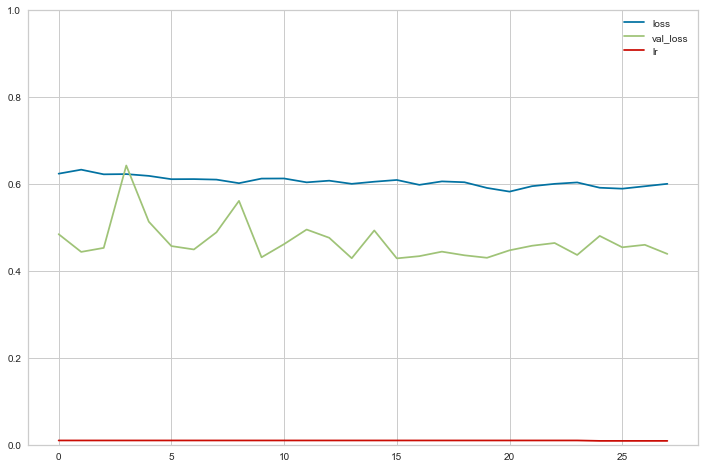

5160/5160 [==============================] - 0s 50us/sample - loss: 0.4117


mse total:  0.41168227218842324


In [58]:
# compile - Train and Evaluate

#model.compile(loss='mse',optimizer='sgd')
model.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))

# Callbacks : son funciones que permiten realizar checkeos o parar el bucle de entrenamiento

### Creacion de Callback de Checkpoint, permite ir guardando los mejores modelos
direccion = 'best_model_2.h5' # nombre de archivo a guardar modelo entrenado

chk = keras.callbacks.ModelCheckpoint(direccion,save_best_only=True,verbose=2)

#### Creacion de callback de Detener entrenamiento en caso no se evidencie mejoras
stp = keras.callbacks.EarlyStopping(patience=20,mode='auto',min_delta=0,restore_best_weights=True,verbose=2)

## Callabck de ajuste de learning rate (lr)
lrs = keras.callbacks.ReduceLROnPlateau(factor=0.9,patience=8,verbose=2)


#########################################

# fit - ajuste de modelo
history = model.fit((X_train_s),
                    (y_train),
                    epochs=200, ## Ojo tiene valor alto gracias al uso de callbacks (CUIDADO!!!)
                    batch_size = 64,
                    shuffle=True, # mezclar las observaciones aleatoriamente
                    callbacks=[chk,stp,lrs], ## se indican callbacks checkpoint,parada y learning rate
                    validation_data=(X_valid_s,y_valid))

## Mediante el uso de Callback de Checkpoint se guarda el mejor modelo, ahora se lee dicho modelo de vuelta
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint


#######################################


# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


# test de rendimiento - mse
mse_total = model.evaluate(X_test_s,y_test)
print('\n\nmse total: ',mse_total)


# fin

In [ ]:
# Cargar Modelo entrenado

direccion = 'best_model_2.h5' # nombre de archivo a guardar modelo entrenado
model = keras.models.load_model(direccion) ## leer mejor modelo guardado por Callback Checkpoint

# fin

In [59]:
# Evaluate - Predict

# Evaluar rendimiento de modelo
mse_total = model.evaluate(X_test_s,y_test)
print('\n\nmse total:   ',round(mse_total,4))

# Prediccion
## Seleccionar algunas observaciones de manera aleatoria
cantidad =30
ii=np.random.randint(low = 0,high=X_test_s.shape[0],size=cantidad)
X_s = X_test_s[ii]
yy = y_test[ii]

y_pred = model.predict(X_s)

print('\n\n  Real  -  Out')
for a,b in zip(yy,y_pred):
    print(' %3.4f   %3.4f' % (a,b))

# fin

5160/5160 [==============================] - 0s 42us/sample - loss: 0.4117


mse total:    0.4117


  Real  -  Out
 0.9750   1.3835
 1.7920   0.8502
 3.6170   2.8637
 4.1780   3.9250
 1.3040   1.3230
 4.9540   4.6615
 1.9230   1.5741
 2.6110   2.7228
 3.2220   2.3279
 1.2470   1.5703
 3.0000   3.3783
 1.3750   2.4128
 1.1560   2.0192
 2.5970   2.0741
 1.0580   1.2187
 1.1160   1.6159
 2.4320   2.8199
 5.0000   4.2771
 0.9340   1.0826
 2.2540   2.3405
 0.7010   1.6861
 1.3220   1.9014
 2.1030   2.0315
 1.1290   1.3234
 1.2630   1.8940
 1.0470   1.4391
 1.1620   1.9263
 1.0450   1.1680
 1.8750   1.9034
 2.1540   1.6437
